### Welcome to Python!
Over the course of this tutorial you'll learch heaps of cool things, and most importantly we'll anser the question
# Why should you care about python?

In [2]:
print('Hello World!')

Hello World!


In [102]:
# import the system library, usefull for obtaining information about the computer and python in general
import sys

In [159]:
# install and import matplotlib
!{sys.executable} -m pip install matplotlib
from matplotlib import pyplot as plt

# Symbolic math with sympy
For symbolic math python offers the sympy (SYMbolic PYthon) library.
Let's go ahead and install it

In [3]:
# install sympy
!{sys.executable} -m pip install sympy

It is possible to generate reserved variables that are treated as independent variables. Let's go ahead and try to calculate an integral

In [25]:
# import various functions and classes from sympy
from sympy import Integral, exp, symbols, oo

# define symbols for x, y and z
x, y, z = symbols('x y z')

# define an expression
expr1 = exp(-x**2 - y**2)

# define an integral
int1 = Integral(expr1, (x, -oo, oo), (y, -oo, oo))
int1

Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [26]:
# integrals can be evaluated with the doit() function
int1.doit()

pi

In [28]:
# define a more complex integral
int2 = Integral(x**y*exp(-x), (x, 0, oo))
int2

Integral(x**y*exp(-x), (x, 0, oo))

In [29]:
# we obtain a result that depends on y
int2.doit()

Piecewise((gamma(y + 1), re(y) > -1), (Integral(x**y*exp(-x), (x, 0, oo)), True))

One can also ask for solutions of ODEs

In [177]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, simplify

# set f as a symbol for functions
f = Function('f')

# define a differential equation
eq = Derivative(f(x), x, x) + 9*f(x)
Eq(eq, 0)

Eq(9*f(x) + Derivative(f(x), (x, 2)), 0)

In [183]:
# solve the differential equation
dsolve(eq)

TypeError: _xreplace() missing 1 required positional argument: 'rule'

In [64]:
t = symbols('t')
x, y = symbols('x, y', cls=Function)
eq = (Eq(Derivative(x(t),t),x(t)*y(t)*sin(t)),
      Eq(Derivative(y(t),t),y(t)**2*sin(t)))
eq[0]


Eq(Derivative(x(t), t), x(t)*y(t)*sin(t))

In [65]:
eq[1]

Eq(Derivative(y(t), t), y(t)**2*sin(t))

In [73]:
sol = dsolve(eq)

In [77]:
sol.pop()

Eq(x(t), -exp(C1)/(C2*exp(C1) - cos(t)))

In [78]:
sol.pop()

Eq(y(t), -1/(C1 - cos(t)))

# Plotting with matplotlib

<IPython.core.display.Javascript object>


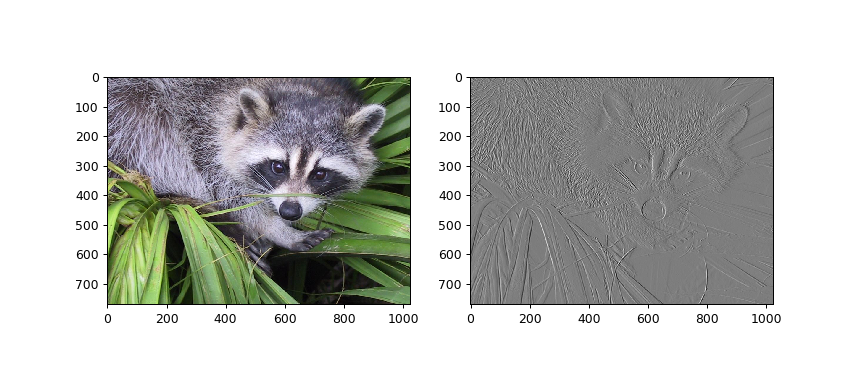

In [157]:
from scipy import misc, ndimage
face = misc.face()

%matplotlib notebook
plt.subplot(121)
plt.imshow(face)

face2 = np.sum(face, axis=2)/256/3
face3 = ndimage.sobel(face2)
plt.subplot(122)
plt.gray()
plt.imshow(face3)

# Handling tables with Pandas

In [80]:
!{sys.executable} -m pip install pandas pydataset

    100% |████████████████████████████████| 15.9MB 97kB/s  eta 0:00:01  4% |█▋                              | 788kB 1.9MB/s eta 0:00:09    68% |█████████████████████▉          | 10.9MB 11.1MB/s eta 0:00:01    84% |███████████████████████████     | 13.4MB 9.8MB/s eta 0:00:01
  Running setup.py bdist_wheel for pydataset ... done
  Running setup.py clean for pydataset
Failed to build pydataset
  Running setup.py install for pydataset ... done


In [94]:
import pandas as pd
pd.__version__

'0.24.2'

In [141]:
from pydataset import data
flights = data('AirPassengers')
flights.head()

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121


<IPython.core.display.Javascript object>


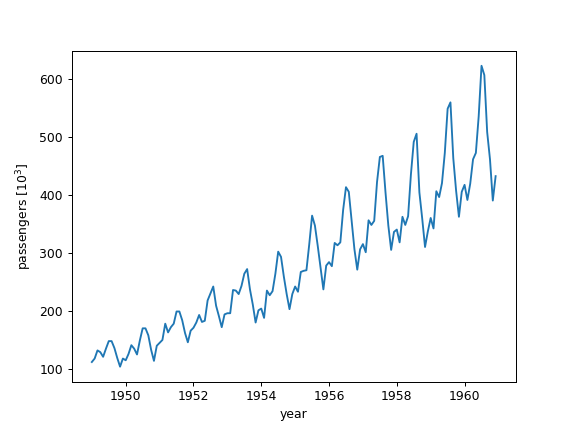

Text(0, 0.5, 'passengers $\\left[10^3\\right]$')

In [158]:

%matplotlib notebook
plt.plot(flights['time'], flights['AirPassengers'])
plt.xlabel('year')
plt.ylabel(r'passengers $\left[10^3\right]$')

In [138]:
iris = data('iris')
print(iris['Species'].unique())
iris.head()

['setosa' 'versicolor' 'virginica']


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


<IPython.core.display.Javascript object>


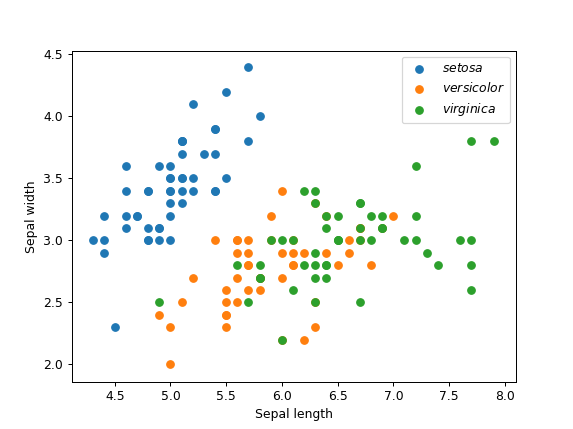

Text(0, 0.5, 'Sepal width')

In [139]:
%matplotlib notebook
for name, group in iris.groupby('Species'):
    plt.scatter(group['Sepal.Length'], group['Sepal.Width'], label = r'$%s$'%name)
    
plt.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


In [140]:
import numpy as np
summary_table = iris.groupby('Species').apply(np.mean)
print(summary_table.to_latex())
summary_table

\begin{tabular}{lrrrr}
\toprule
{} &  Sepal.Length &  Sepal.Width &  Petal.Length &  Petal.Width \\
Species    &               &              &               &              \\
\midrule
setosa     &         5.006 &        3.428 &         1.462 &        0.246 \\
versicolor &         5.936 &        2.770 &         4.260 &        1.326 \\
virginica  &         6.588 &        2.974 &         5.552 &        2.026 \\
\bottomrule
\end{tabular}



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026
